<a href="https://www.kaggle.com/code/ifeanyichukwunwobodo/using-the-cenpy-api-to-import-us-census-data?scriptVersionId=130762724" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style='color: #7954A1;
           background-color: #EFDCF9;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: violet;
           font-family: "Cambria";'>
USING CENPY API TO IMPORT US CENSUS DATA
<a class="anchor" id="1"></a> 


# **INTRODUCTION**

Looking for demographical data for your next project?

Finding it hard to get geographical data for geospatial data analysis?
SAY NO MORE!

It gets frustrating to when you're interested in a project but are unable to get data on the topic.

This notebook gives a short introduction on using the Cenpy API from the American Census Society (ACS) to import United States census data on Python.

In [1]:
#install cenpy api 
!pip install cenpy

  Preparing metadata (setup.py) ... - done
  Created wheel for cenpy: filename=cenpy-1.0.1-py3-none-any.whl size=30061 sha256=88d1f5ccab233b956442f8ca4ae38fe24de45980e50a79bfe4d3c34fdc1dc964
  Stored in directory: /root/.cache/pip/wheels/ae/d5/f5/e917dbc2b3c91df15afd4cf7946c850cf0ebbfd1f9af573896
Successfully built cenpy


<div style='color: #7954A1;
           background-color: #EFDCF9;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: violet;
           font-family: "Cambria";'>
WHAT IS THE CENPY API ALL ABOUT?
<a class="anchor" id="1"></a> 


Cenpy (pronounced sen-pie) is a package that automatically discovers US Census Bureau API endpoints and exposes them to Python in a consistent fashion.

<div style='color: #7954A1;
           background-color: #EFDCF9;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: violet;
           font-family: "Cambria";'>
IMPORT IMPORTANT LIBRARIES
<a class="anchor" id="1"></a> 



In [2]:
#import the important dependencies
import contextily
import cenpy
#set the time period of interest
acs = cenpy.products.ACS(2017)

#Note: ACS is an abbreviation of American Census Society

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<div style='color: #7954A1;
           background-color: #EFDCF9;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: violet;
           font-family: "Cambria";'>
CHOOSE VARIABLES TO IMPORT
<a class="anchor" id="1"></a> 




This depends on the project you are working on and the problem statement of interest. Different codes are used to refer to different indicators. The [Cenpy documentation](https://cenpy-devs.github.io/cenpy/api.html) explains the code for each of the indicators. 

In [3]:
# define dictionary to represent indicators of interest
vars_to_download = {
    "B25077_001E": "median_house_value",  # Median house value
    "B02001_002E": "total_pop_white",     # Total white population
    "B01003_001E": "total_pop",           # Total population
    "B25003_003E": "total_rented",        # Total rented occupied
    "B25001_001E": "total_housing_units", # Total housing units
    "B09019_006E": "hh_female",           # Female households
    "B09019_001E": "hh_total",            # Total households
    "B15003_002E": "total_bachelor",      # Total w/ Bachelor degree
    "B25018_001E": "median_no_rooms",     # Median number of rooms
    "B19083_001E": "income_gini",         # Gini index of income inequality
    "B01002_001E": "median_age",          # Median age
    "B08303_001E": "tt_work",              # Aggregate travel time to work
    "B19013_001E": "median_hh_income"     # Median household income
}
#Save as list
vars_to_download_l = list(vars_to_download.keys())

You can get data on the various cities in United States. For this example we are going to focus on San Diegoa and we are going to use data from America Cenus Survey. The American Community Survey (ACS) is a demographics survey program conducted by the U.S. Census Bureau. It regularly gathers information previously contained only in the long form of the decennial census, including ancestry, citizenship, educational attainment, income, language proficiency, migration, disability, employment, and housing characteristics. These data are used by many public-sector, private-sector, and not-for-profit stakeholders to allocate funding, track shifting demographics, plan for emergencies, and learn about local communities.Sent to approximately 295,000 addresses monthly (or 3.5 million per year), it is the largest household survey that the Census Bureau administers.

Cenpy also have other products available. You can also check the [Cenpy documentation](https://cenpy-devs.github.io/cenpy/api.html) to get more detail.

In [4]:
#Select city of interest along with variables of interest
db = acs.from_msa("San Diego, CA",
                  level="tract",
                  variables=vars_to_download_l
                 )

/opt/conda/lib/python3.7/site-packages/cenpy/products.py:749: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  msa, variables, level, "Metropolitan Statistical Area", **kwargs


In [5]:
#yOUR FIRST CENPY IMPORT!!
db.head()

,GEOID,geometry,B01002_001E,B01003_001E,B02001_002E,B08303_001E,B09019_001E,B09019_006E,B15003_002E,B19013_001E,B19083_001E,B25001_001E,B25003_003E,B25018_001E,B25077_001E,NAME,state,county,tract
0,06073007701,"POLYGON ((-13052014.930 3867748.530, -13051974...",31.9,4074.0,3737.0,2243.0,4074.0,301.0,0.0,73019.0,0.4182,2394.0,1499.0,3.9,852000.0,"Census Tract 77.01, San Diego County, California",06,073,007701
1,06073008002,"POLYGON ((-13052206.510 3870188.930, -13052193...",37.0,2968.0,2677.0,1558.0,2968.0,296.0,0.0,109224.0,0.4094,1117.0,345.0,5.5,893300.0,"Census Tract 80.02, San Diego County, California",06,073,008002
2,06073007903,"POLYGON ((-13051964.720 3869215.200, -13051923...",30.2,4660.0,4079.0,3100.0,4660.0,425.0,0.0,59781.0,0.4528,2582.0,1713.0,3.8,423500.0,"Census Tract 79.03, San Diego County, California",06,073,007903
3,06073008364,"POLYGON ((-13050548.180 3875343.810, -13050522...",30.1,5811.0,3135.0,3169.0,5811.0,448.0,0.0,71629.0,0.3986,2902.0,2090.0,3.7,601100.0,"Census Tract 83.64, San Diego County, California",06,073,008364
4,06073008305,"POLYGON ((-13051530.240 3879241.240, -13051529...",27.1,2002.0,1053.0,879.0,2002.0,152.0,0.0,37863.0,0.4797,815.0,706.0,4.0,517900.0,"Census Tract 83.05, San Diego County, California",06,073,008305


<div style='color: #7954A1;
           background-color: #EFDCF9;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: violet;
           font-family: "Cambria";'>
HOW TO GET METADATA
<a class="anchor" id="1"></a> 


YAY!! You just made your first import.
But wait! Before you get too excited, there's a problem. Our dataset have different codes a columns headers. And it will be a very demanding task to skip to the Cenpy documentation to get the interpretation of these codes. Say no more! You can create a metadata dataframe. 

In [6]:
"""
create dataframes for metaindicators.
Rename index coln var_id
"""
var_names = acs.variables\
               .reindex(vars_to_download)\
               [["label", "concept"]]\
               .reset_index()\
               .rename(columns={"index": "var_id"})
var_names["short_name"] = var_names["var_id"].map(vars_to_download)

In [7]:
#Turn it to as csv file
var_names.to_csv('metaindicator.csv')
#view the first few lines of metaindicator
var_names.head()

,var_id,label,concept,short_name
0,B25077_001E,Estimate!!Median value (dollars),MEDIAN VALUE (DOLLARS),median_house_value
1,B02001_002E,Estimate!!Total!!White alone,RACE,total_pop_white
2,B01003_001E,Estimate!!Total,TOTAL POPULATION,total_pop
3,B25003_003E,Estimate!!Total!!Renter occupied,TENURE,total_rented
4,B25001_001E,Estimate!!Total,HOUSING UNITS,total_housing_units


Now you data is ready for analysis!!

In [8]:
#deal with missing value
filler = lambda col: col.fillna(col.mean())
db.loc[:, vars_to_download] = db.loc[:, vars_to_download]\
                                .apply(filler)


In [9]:
#since the original indicators are represented in codes, rename the variables
db = db.rename(columns=vars_to_download)
db.head()

,GEOID,geometry,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,total_housing_units,total_rented,median_no_rooms,median_house_value,NAME,state,county,tract
0,06073007701,"POLYGON ((-13052014.930 3867748.530, -13051974...",31.9,4074.0,3737.0,2243.0,4074.0,301.0,0.0,73019.0,0.4182,2394.0,1499.0,3.9,852000.0,"Census Tract 77.01, San Diego County, California",06,073,007701
1,06073008002,"POLYGON ((-13052206.510 3870188.930, -13052193...",37.0,2968.0,2677.0,1558.0,2968.0,296.0,0.0,109224.0,0.4094,1117.0,345.0,5.5,893300.0,"Census Tract 80.02, San Diego County, California",06,073,008002
2,06073007903,"POLYGON ((-13051964.720 3869215.200, -13051923...",30.2,4660.0,4079.0,3100.0,4660.0,425.0,0.0,59781.0,0.4528,2582.0,1713.0,3.8,423500.0,"Census Tract 79.03, San Diego County, California",06,073,007903
3,06073008364,"POLYGON ((-13050548.180 3875343.810, -13050522...",30.1,5811.0,3135.0,3169.0,5811.0,448.0,0.0,71629.0,0.3986,2902.0,2090.0,3.7,601100.0,"Census Tract 83.64, San Diego County, California",06,073,008364
4,06073008305,"POLYGON ((-13051530.240 3879241.240, -13051529...",27.1,2002.0,1053.0,879.0,2002.0,152.0,0.0,37863.0,0.4797,815.0,706.0,4.0,517900.0,"Census Tract 83.05, San Diego County, California",06,073,008305


In [10]:

tract_geoids = [
     '06073000100',
     '06073000201',
     '06073000202',
     '06073000300',
     '06073000400',
     '06073000500',
     '06073000600',
     '06073000700',
     '06073000800',
     '06073000900',
     '06073001000',
     '06073001100',
     '06073001200',
     '06073001300',
     '06073001400',
     '06073001500',
     '06073001600',
     '06073001700',
     '06073001800',
     '06073001900',
     '06073002001',
     '06073002002',
     '06073002100',
     '06073002201',
     '06073002202',
     '06073002301',
     '06073002302',
     '06073002401',
     '06073002402',
     '06073002501'
]
db["sub_30"] = False
db.loc[db["GEOID"].isin(tract_geoids), "sub_30"] = True

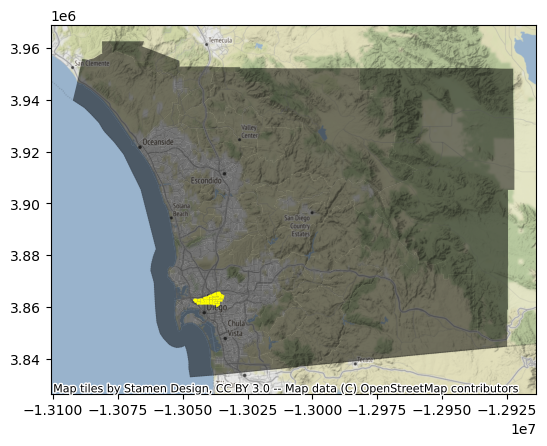

In [11]:
#a graph showing sandiego map using contextily
ax = db.plot(alpha=0.5, color="k")
db[db["sub_30"]].plot(ax=ax, color="yellow")
contextily.add_basemap(ax, crs=db.crs);

In [12]:
db.head()

,GEOID,geometry,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,total_housing_units,total_rented,median_no_rooms,median_house_value,NAME,state,county,tract,sub_30
0,06073007701,"POLYGON ((-13052014.930 3867748.530, -13051974...",31.9,4074.0,3737.0,2243.0,4074.0,301.0,0.0,73019.0,0.4182,2394.0,1499.0,3.9,852000.0,"Census Tract 77.01, San Diego County, California",06,073,007701,False
1,06073008002,"POLYGON ((-13052206.510 3870188.930, -13052193...",37.0,2968.0,2677.0,1558.0,2968.0,296.0,0.0,109224.0,0.4094,1117.0,345.0,5.5,893300.0,"Census Tract 80.02, San Diego County, California",06,073,008002,False
2,06073007903,"POLYGON ((-13051964.720 3869215.200, -13051923...",30.2,4660.0,4079.0,3100.0,4660.0,425.0,0.0,59781.0,0.4528,2582.0,1713.0,3.8,423500.0,"Census Tract 79.03, San Diego County, California",06,073,007903,False
3,06073008364,"POLYGON ((-13050548.180 3875343.810, -13050522...",30.1,5811.0,3135.0,3169.0,5811.0,448.0,0.0,71629.0,0.3986,2902.0,2090.0,3.7,601100.0,"Census Tract 83.64, San Diego County, California",06,073,008364,False
4,06073008305,"POLYGON ((-13051530.240 3879241.240, -13051529...",27.1,2002.0,1053.0,879.0,2002.0,152.0,0.0,37863.0,0.4797,815.0,706.0,4.0,517900.0,"Census Tract 83.05, San Diego County, California",06,073,008305,False


In [13]:
#export as csv
db.to_csv('San Francisco.csv')